## Problem Statement



> **QUESTION**: The [Rain in Australia dataset](https://kaggle.com/jsphyg/weather-dataset-rattle-package) contains about 10 years of daily weather observations from numerous Australian weather stations.
> As a data scientist at the Bureau of Meteorology, you are tasked with creating a fully-automated system that can use today's weather data for a given location to predict whether it will rain at the location tomorrow.
> Use Decision Trees and Random Forests to build a classification model that predicts whether it will rain tomorrow based on today's weather data.

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import os

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

## Dowloading the Dataset

In [7]:
raw_df = pd.read_csv('weatherAUS.csv')

In [8]:
raw_df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [9]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [10]:
raw_df.dropna(subset=['RainTomorrow'], inplace=True)

> **EXERCISE**: Perform exploratory data analysis on the dataset and study the relationship of other columns with the `RainTomorrow` column.

## Data Exploration

In [11]:
raw_df["Date"] = pd.to_datetime(raw_df["Date"], errors="coerce")

In [12]:
raw_df["RainTomorrow"] = raw_df["RainTomorrow"].astype("string").str.strip()
df = raw_df[raw_df["RainTomorrow"].isin(["Yes", "No"])].copy()

In [36]:
raw_df['RainTomorrow_bin']= raw_df['RainTomorrow'].map({'Yes':1, 'No':0})

In [15]:
raw_df.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,RainTomorrow_bin
145454,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,E,15.0,13.0,59.0,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,No,0
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No,0
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No,0
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No,0
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No,0


#### Missingness Observation

In [16]:
missing = raw_df.isna().mean().sort_values(ascending=False) * 100

miss_tbl = missing.to_frame('missing_pct').round(2)
display(miss_tbl)

,missing_pct
Sunshine,47.69
Evaporation,42.79
Cloud3pm,40.15
Cloud9am,37.74
Pressure9am,9.86
Pressure3pm,9.83
WindDir9am,7.04
WindGustDir,6.56
WindGustSpeed,6.52
WindDir3pm,2.66


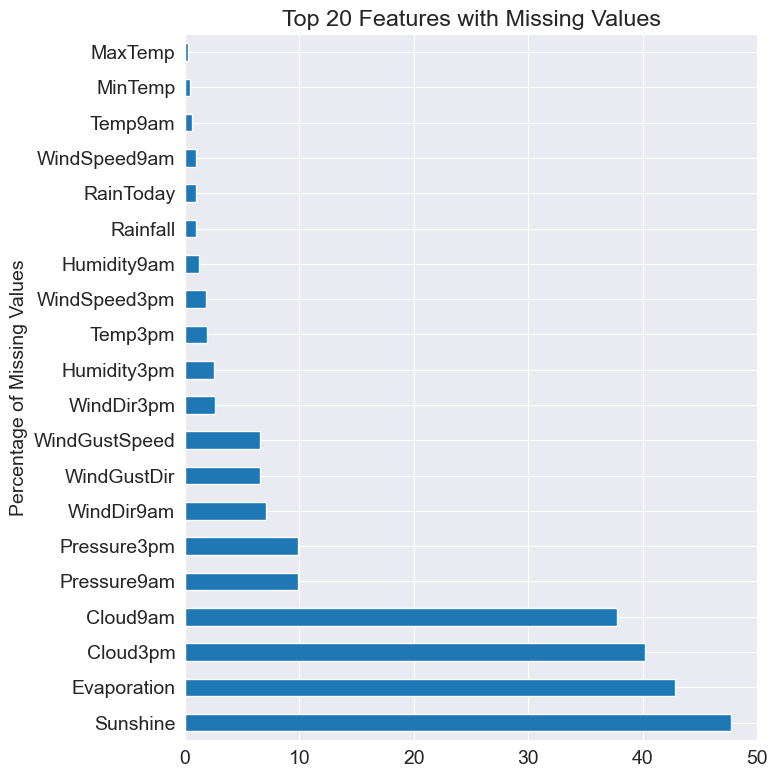

In [18]:
plt.figure(figsize=(8,8))
missing.head(20).plot(kind='barh')
plt.title('Top 20 Features with Missing Values')
plt.ylabel('Percentage of Missing Values')
plt.tight_layout()
plt.show()

### Target Variable Distribution

In [204]:
target_counts = raw_df['RainTomorrow'].value_counts(dropna=False)
target_pct = (target_counts / target_counts.sum()*100).round(2)
print("RainTomorrow counts:\n", target_counts)
print("\nRainTomorrow %:\n", target_pct)

RainTomorrow counts:
 RainTomorrow
No     110316
Yes     31877
Name: count, dtype: Int64

RainTomorrow %:
 RainTomorrow
No     77.58
Yes    22.42
Name: count, dtype: Float64


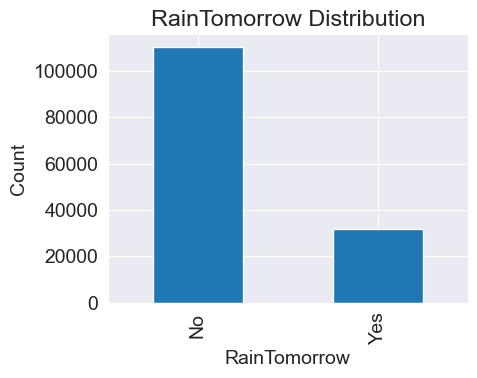

In [92]:
plt.figure(figsize=(5, 4))
target_counts.plot(kind="bar")
plt.title("RainTomorrow Distribution")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


### Numeric Relationships with RainTomorrow

In [28]:
num_cols = raw_df.select_dtypes(include=[np.number]).columns.tolist()
# remove the binary target itself from the feature list
num_feat = [col for col in num_cols if col != 'RainTomorrow_bin']

In [25]:
group_means = raw_df.groupby('RainTomorrow')[num_feat].mean().T
group_means.columns = ['Mean_No', 'Mean_Yes'] if 'No' in group_means.columns else group_means.columns
display(group_means.sort_values(by=group_means.columns[-1], ascending=False).head(20))


,Mean_No,Mean_Yes
Pressure9am,1018.595599,1014.400000
Pressure3pm,1016.113587,1012.300820
Humidity9am,66.217573,77.983314
Humidity3pm,46.510625,68.800019
WindGustSpeed,38.288391,45.946764
MaxTemp,23.836247,21.119100
WindSpeed3pm,18.222804,20.078509
Temp3pm,22.402905,19.197113
Temp9am,17.077001,16.676598
WindSpeed9am,13.567314,15.508577


In [30]:
# Point-biserial correlations (equivalent to Pearson with binary target)
corrs = {}
for c in num_feat:
    # dropna pairwise
    sub = raw_df[["RainTomorrow_bin", c]].dropna()
    if sub[c].nunique() > 1:
        corrs[c] = sub["RainTomorrow_bin"].corr(sub[c])
corr_s = pd.Series(corrs).sort_values(ascending=False)
print("\nTop positive corr with RainTomorrow (binary):")
display(corr_s.head(10).to_frame("corr"))
print("\nTop negative corr with RainTomorrow (binary):")
display(corr_s.tail(10).to_frame("corr"))


Top positive corr with RainTomorrow (binary):


,corr
Humidity3pm,0.446160
Cloud3pm,0.381870
Cloud9am,0.317380
Humidity9am,0.257161
Rainfall,0.239032
WindGustSpeed,0.234010
WindSpeed9am,0.090995
WindSpeed3pm,0.087817
MinTemp,0.083936
Temp9am,-0.025691



Top negative corr with RainTomorrow (binary):


,corr
WindSpeed9am,0.090995
WindSpeed3pm,0.087817
MinTemp,0.083936
Temp9am,-0.025691
Evaporation,-0.119285
MaxTemp,-0.159237
Temp3pm,-0.192424
Pressure3pm,-0.226031
Pressure9am,-0.246371
Sunshine,-0.450768


Rainy days show **lower pressure** (around 1014 hPa) and **higher humidity**, especially in the afternoon, compared to non-rainy days.
**Wind gusts and overall wind speeds** tend to increase before rain, indicating incoming weather fronts.
**Temperatures (MaxTemp, Temp3pm)** are generally lower on days followed by rain, while **cloud coverage** and **rainfall amounts** rise sharply.
The strongest positive correlations with *RainTomorrow* are **Humidity3pm**, **Cloud3pm**, and **Rainfall**, while **Sunshine** and **Pressure** show strong negative correlations — confirming that **humid, cloudy, and low-pressure days are strong indicators of upcoming rain.**


### Some Plots

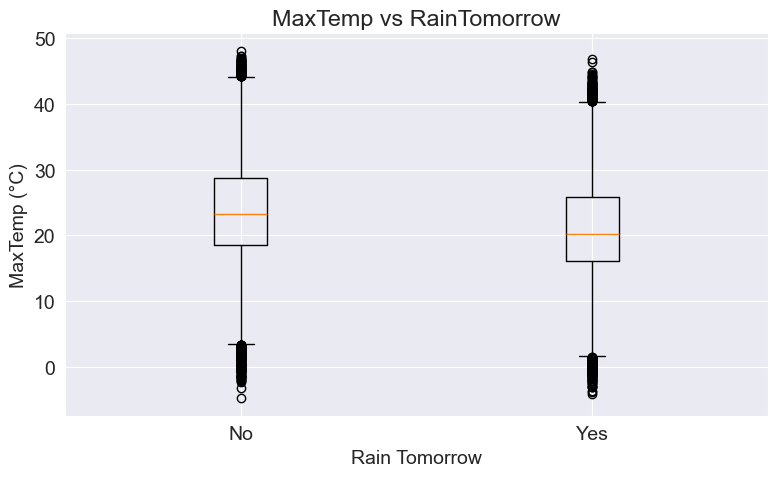

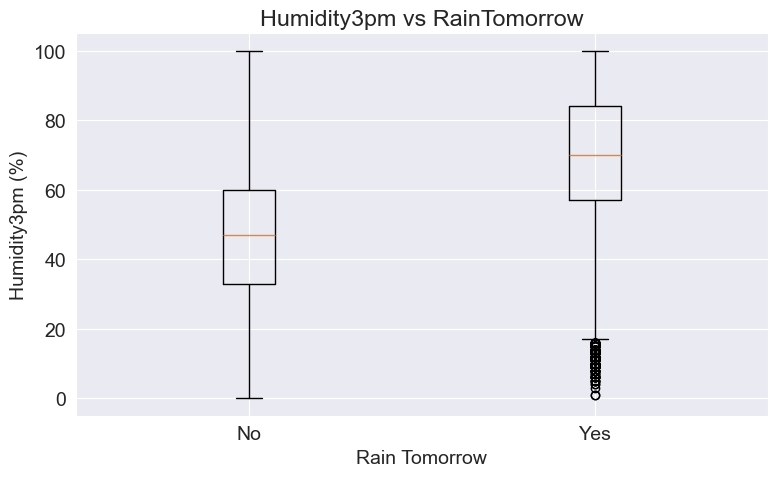

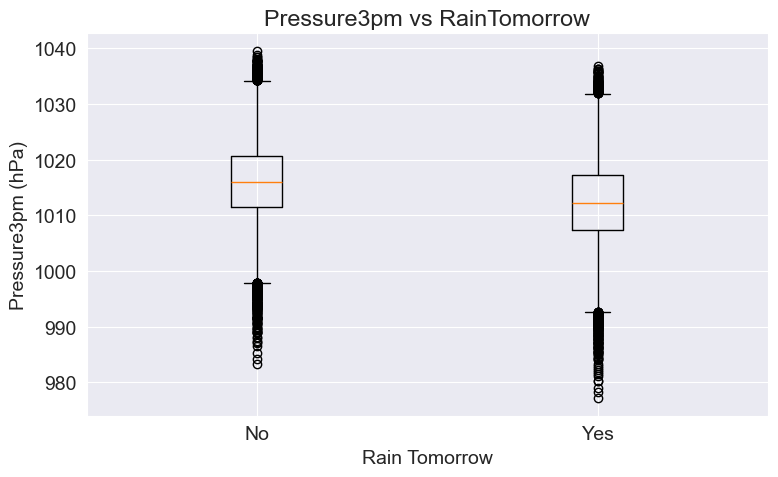

In [182]:
def safe_boxplot(feature,ylabel=None,title=None):
    if feature not in raw_df.columns:
        print(f"Feature '{feature}' not found in DataFrame.")
        return
    sub = raw_df[[feature,'RainTomorrow']].dropna()
    if sub.empty:
        print(f"No data available for feature '{feature}' after dropping NaNs.")
        return
    plt.figure(figsize=(8, 5))
    data_no = sub[sub['RainTomorrow']=='No'][feature]
    data_yes = sub[sub['RainTomorrow']=='Yes'][feature]
    plt.boxplot([data_no, data_yes], tick_labels=['No', 'Yes'])
    plt.xlabel('Rain Tomorrow')
    plt.ylabel(ylabel if ylabel else feature)
    plt.title(title if title else f'{feature} vs Rain Tomorrow')
    plt.tight_layout()
    plt.show()

safe_boxplot("MaxTemp", ylabel="MaxTemp (°C)", title="MaxTemp vs RainTomorrow")
safe_boxplot("Humidity3pm", ylabel="Humidity3pm (%)", title="Humidity3pm vs RainTomorrow")
safe_boxplot("Pressure3pm", ylabel="Pressure3pm (hPa)", title="Pressure3pm vs RainTomorrow")

### Summary

In [40]:
summary_lines = []

# Target imbalance
yes_rate = raw_df["RainTomorrow_bin"].mean()
summary_lines.append(f"- RainTomorrow 'Yes' rate: {yes_rate*100:.2f}% ({(1-yes_rate)*100:.2f}% 'No').")

# Top correlations
top_pos = corr_s.head(5)
top_neg = corr_s.tail(5)

summary_lines.append("\n- Strongest positive numeric correlations with RainTomorrow (binary):")
for k, v in top_pos.items():
    summary_lines.append(f"  • {k}: {v:.3f}")

summary_lines.append("\n- Strongest negative numeric correlations with RainTomorrow (binary):")
for k, v in top_neg.items():
    summary_lines.append(f"  • {k}: {v:.3f}")

# RainToday conditional rates (if present)
if "RainToday" in raw_df.columns:
    tmp = raw_df[["RainToday", "RainTomorrow_bin"]].dropna()
    p_yes_given_yes = tmp.loc[tmp["RainToday"] == "Yes", "RainTomorrow_bin"].mean()
    p_yes_given_no  = tmp.loc[tmp["RainToday"] == "No", "RainTomorrow_bin"].mean()
    summary_lines.append(
        f"\n- P(RainTomorrow=Yes | RainToday=Yes): {p_yes_given_yes*100:.2f}%; "
        f"P(RainTomorrow=Yes | RainToday=No): {p_yes_given_no*100:.2f}%."
    )

print("\n".join(summary_lines))

- RainTomorrow 'Yes' rate: 22.42% (77.58% 'No').

- Strongest positive numeric correlations with RainTomorrow (binary):
  • Humidity3pm: 0.446
  • Cloud3pm: 0.382
  • Cloud9am: 0.317
  • Humidity9am: 0.257
  • Rainfall: 0.239

- Strongest negative numeric correlations with RainTomorrow (binary):
  • MaxTemp: -0.159
  • Temp3pm: -0.192
  • Pressure3pm: -0.226
  • Pressure9am: -0.246
  • Sunshine: -0.451

- P(RainTomorrow=Yes | RainToday=Yes): 46.41%; P(RainTomorrow=Yes | RainToday=No): 15.19%.


## Preparing the Data for Training

We'll perform the following steps to prepare the dataset for training:

1. Create a train/test/validation split
2. Identify input and target columns
3. Identify numeric and categorical columns
4. Impute (fill) missing numeric values
5. Scale numeric values to the $(0, 1)$ range
6. Encode categorical columns to one-hot vectors

### Training, Validation and Test Sets

<Axes: title={'center': 'No. of Rows per Year'}, xlabel='Date', ylabel='count'>

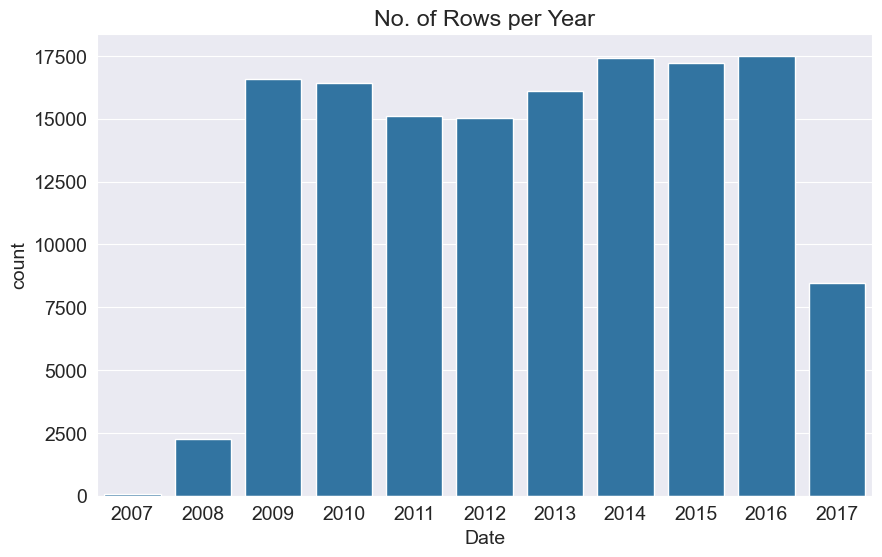

In [41]:
plt.title('No. of Rows per Year')
sns.countplot(x=raw_df['Date'].dt.year)

In [42]:
year = pd.to_datetime(raw_df['Date']).dt.year

train_df = raw_df[year < 2015].copy()
val_df = raw_df[year == 2015].copy()
test_df = raw_df[year > 2015].copy()

In [43]:
print("Train set shape:", train_df.shape)
print("Validation set shape:", val_df.shape)
print("Test set shape:", test_df.shape)

Train set shape: (98988, 24)
Validation set shape: (17231, 24)
Test set shape: (25974, 24)


### Input and Target Columns

Let's identify the input and target columns.

In [95]:
# Exclude 'Date' and 'RainTomorrow' from inputs
input_cols = list(train_df.columns)[1:-1]
target_col = 'RainTomorrow'

In [96]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()

val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()

test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_col].copy()

In [97]:
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()

In [98]:
print(f'Numerical columns ({len(numeric_cols)}):')
print(numeric_cols)
print(f'\nCategorical columns ({len(categorical_cols)}):')
print(categorical_cols)

Numerical columns (16):
['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']

Categorical columns (5):
['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']


### Imputing Missing Numeric Values

In [203]:
from sklearn.impute import SimpleImputer

In [222]:
imputer = SimpleImputer(strategy='mean').fit(raw_df[numeric_cols])

In [100]:
train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])

In [234]:
test_inputs[numeric_cols].isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

### Scaling numeric features

In [102]:
from sklearn.preprocessing import MinMaxScaler

In [58]:
scaler = MinMaxScaler().fit(raw_df[numeric_cols])

In [103]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [104]:
val_inputs.describe().loc[['min', 'max']]

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
min,0.007075,0.030246,0.000000,0.000000,0.0,0.007752,0.000000,0.000000,0.04,0.0,0.125620,0.0816,0.000000,0.000000,0.021097,0.026871
max,0.952830,0.948960,0.666307,0.485517,1.0,1.000000,0.669231,0.850575,1.00,1.0,0.971901,0.9632,0.888889,0.888889,0.943038,0.925144


### Encoding Categorical Features

In [105]:
from sklearn.preprocessing import OneHotEncoder

In [106]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore').fit(raw_df[categorical_cols])

In [108]:
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))

train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

Final Step : Drop the initial categorical columns

In [109]:
X_train = train_inputs[numeric_cols + encoded_cols]
X_val = val_inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

## Training and Visualizing Decision Trees

A decision tree in general parlance represents a hierarchical series of binary decisions:

<img src="https://i.imgur.com/qSH4lqz.png" width="480">


A decision tree in machine learning works in exactly the same way, and except that we let the computer figure out the optimal structure & hierarchy of decisions, instead of coming up with criteria manually.

### Training

We can use `DecisionTreeClassifier` from `sklearn.tree` to train a decision tree.

In [110]:
from sklearn.tree import DecisionTreeClassifier

In [111]:
model = DecisionTreeClassifier(random_state=12)

In [112]:
model.fit(X_train, train_targets)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,12
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


### Evaluation

Let's evaluate the decision tree using the accuracy score.

In [113]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [114]:
train_preds = model.predict(X_train)

In [115]:
accuracy_score(train_targets, train_preds)

0.9999797955307714

The training set accuracy is 100%! But we can't rely solely on the training set accuracy, we must evaluate the model on the validation set too.

We can make predictions and compute accuracy in one step using `model.score`

In [116]:
model.score(X_val, val_targets)

0.7923509952991701

### Visualization

We can visualize the decision tree _learned_ from the training data.

In [117]:
from sklearn.tree import plot_tree, export_text

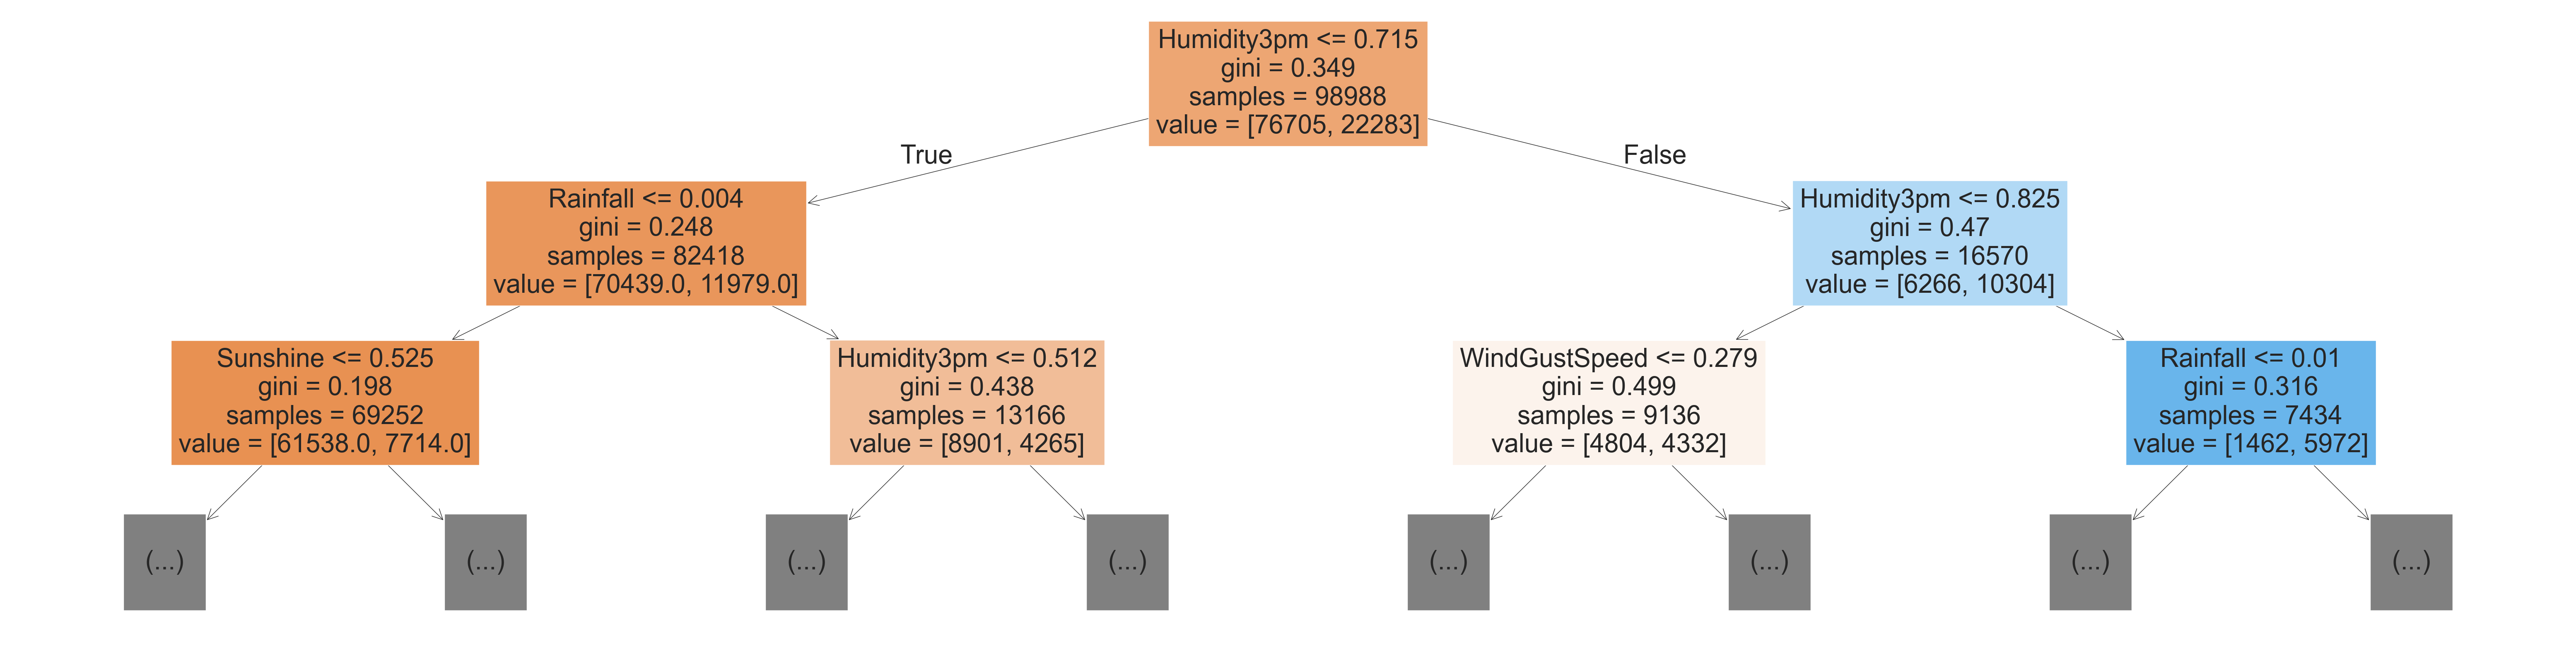

In [118]:
plt.figure(figsize=(80,20))
plot_tree(model, feature_names=X_train.columns, max_depth=2, filled=True);

In [119]:
model.tree_.max_depth

48

Can you see how the model classifies a given input as a series of decisions? The tree is truncated here, but following any path from the root node down to a leaf will result in "Yes" or "No". Do you see how a decision tree differs from a logistic regression model?


**How a Decision Tree is Created**

Note the `gini` value in each box. This is the loss function used by the decision tree to decide which column should be used for splitting the data, and at what point the column should be split. A lower Gini index indicates a better split. A perfect split (only one class on each side) has a Gini index of 0.

For a mathematical discussion of the Gini Index, watch this video: https://www.youtube.com/watch?v=-W0DnxQK1Eo . It has the following formula:

<img src="https://i.imgur.com/CSC0gAo.png" width="240">

Conceptually speaking, while training the models evaluates all possible splits across all possible columns and picks the best one. Then, it recursively performs an optimal split for the two portions. In practice, however, it's very inefficient to check all possible splits, so the model uses a heuristic (predefined strategy) combined with some randomization.

The iterative approach of the machine learning workflow in the case of a decision tree involves growing the tree layer-by-layer:

<img src="https://www.deepnetts.com/blog/wp-content/uploads/2019/02/SupervisedLearning.png" width="480">



In [120]:
tree_text = export_text(model, max_depth=10, feature_names=list(X_train.columns))
print(tree_text[:5000])

|--- Humidity3pm <= 0.72
|   |--- Rainfall <= 0.00
|   |   |--- Sunshine <= 0.52
|   |   |   |--- Pressure3pm <= 0.58
|   |   |   |   |--- WindGustSpeed <= 0.36
|   |   |   |   |   |--- Humidity3pm <= 0.28
|   |   |   |   |   |   |--- WindDir9am_NE <= 0.50
|   |   |   |   |   |   |   |--- Location_Watsonia <= 0.50
|   |   |   |   |   |   |   |   |--- Cloud9am <= 0.83
|   |   |   |   |   |   |   |   |   |--- WindSpeed3pm <= 0.07
|   |   |   |   |   |   |   |   |   |   |--- Pressure9am <= 0.47
|   |   |   |   |   |   |   |   |   |   |   |--- class: Yes
|   |   |   |   |   |   |   |   |   |   |--- Pressure9am >  0.47
|   |   |   |   |   |   |   |   |   |   |   |--- class: No
|   |   |   |   |   |   |   |   |   |--- WindSpeed3pm >  0.07
|   |   |   |   |   |   |   |   |   |   |--- MinTemp <= 0.32
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- MinTemp >  0.32
|   |   |   |   |   |   |   |   |   |   |   |--- truncated

### Feature Importance

Based on the gini index computations, a decision tree assigns an "importance" value to each feature. These values can be used to interpret the results given by a decision tree.

In [121]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

In [122]:
importance_df.head(10)

,feature,importance
9,Humidity3pm,0.260426
11,Pressure3pm,0.062782
2,Rainfall,0.058342
5,WindGustSpeed,0.055280
4,Sunshine,0.050573
8,Humidity9am,0.039751
0,MinTemp,0.035079
10,Pressure9am,0.034808
14,Temp9am,0.034709
1,MaxTemp,0.032281


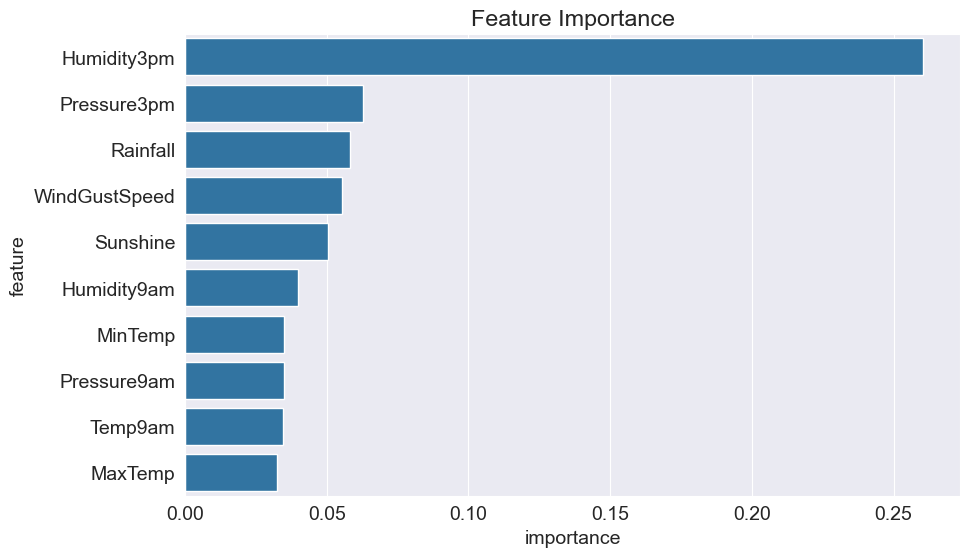

In [123]:
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

## Hyperparameter Tuning and Overfitting

As we saw in the previous section, our decision tree classifier memorized all training examples, leading to a 100% training accuracy, while the validation accuracy was only marginally better than a dumb baseline model. This phenomenon is called overfitting, and in this section, we'll look at some strategies for reducing overfitting.

The `DecisionTreeClassifier` accepts several arguments, some of which can be modified to reduce overfitting.

These arguments are called hyperparameters because they must be configured manually (as opposed to the parameters within the model which are _learned_ from the data. We'll explore a couple of hyperparameters:

- `max_depth`
- `max_leaf_nodes`

In [124]:
model = DecisionTreeClassifier(max_depth=3, random_state=12)

In [125]:
model.fit(X_train, train_targets)

,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,12
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [126]:
model.score(X_train, train_targets)

0.8291308037337859

In [127]:
model.score(X_val, val_targets)

0.8334397307178921

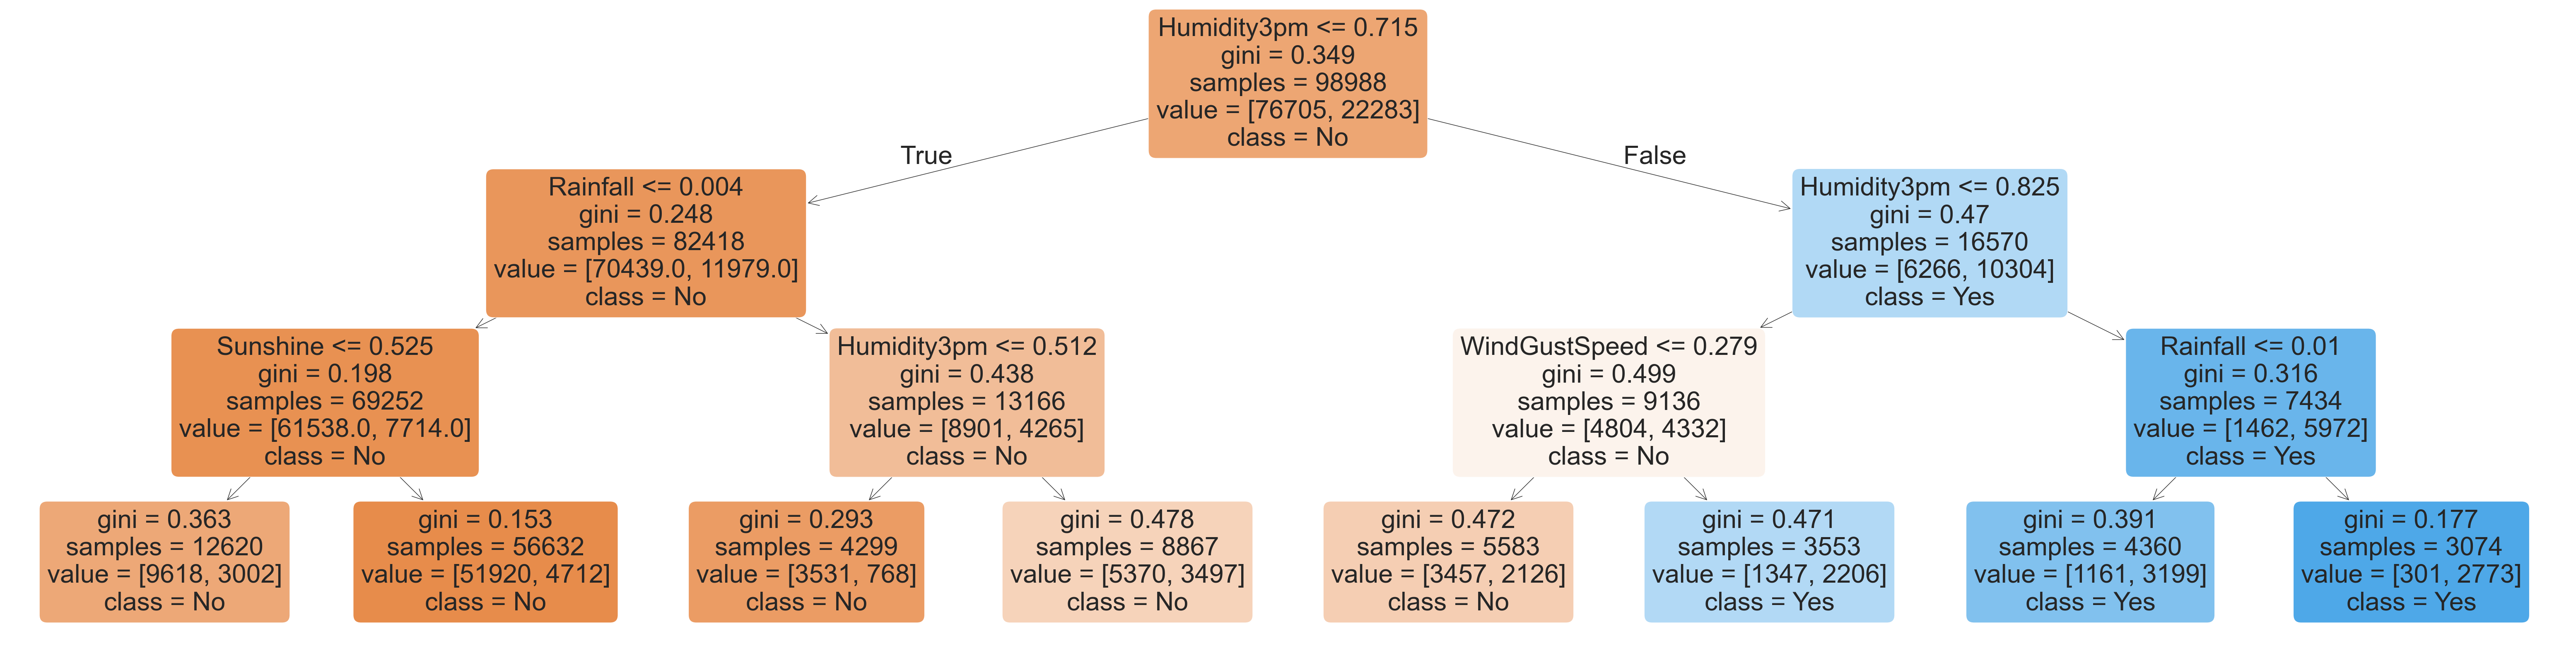

In [128]:
plt.figure(figsize=(80,20))
plot_tree(model, feature_names=X_train.columns, filled=True, rounded=True, class_names=model.classes_);

In [129]:
def max_depth_error(md):
    model = DecisionTreeClassifier(max_depth=md, random_state=42)
    model.fit(X_train, train_targets)
    train_acc = 1 - model.score(X_train, train_targets)
    val_acc = 1 - model.score(X_val, val_targets)
    return {'Max Depth': md, 'Training Error': train_acc, 'Validation Error': val_acc}

In [130]:
%%time
errors_df = pd.DataFrame([max_depth_error(md) for md in range(1, 21)])

CPU times: total: 26.5 s
Wall time: 26.8 s


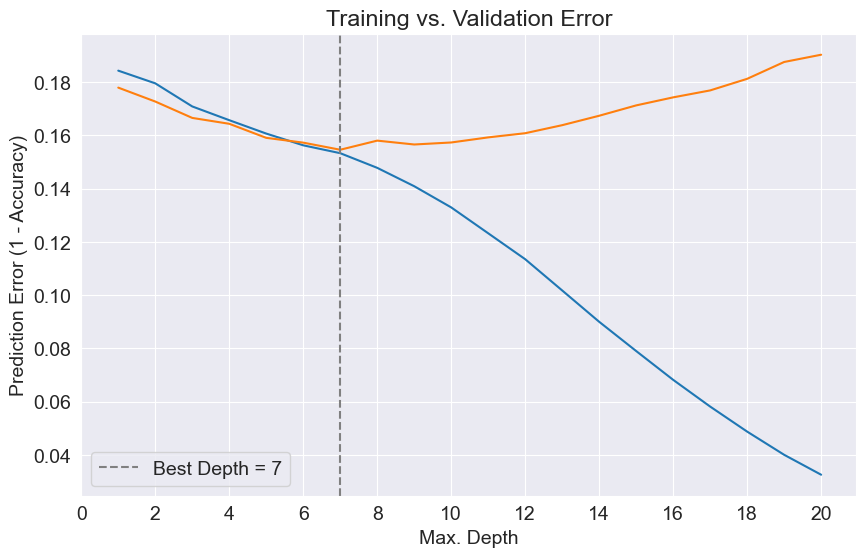

In [137]:
plt.figure()
plt.plot(errors_df['Max Depth'], errors_df['Training Error'])
plt.plot(errors_df['Max Depth'], errors_df['Validation Error'])
plt.title('Training vs. Validation Error')
plt.xticks(range(0,21, 2))
plt.xlabel('Max. Depth')
plt.ylabel('Prediction Error (1 - Accuracy)')
plt.legend(['Training', 'Validation'])

best_depth = errors_df.loc[errors_df['Validation Error'].idxmin(), 'Max Depth']
plt.axvline(best_depth, color='gray', linestyle='--', label=f'Best Depth = {best_depth}')
plt.legend()


In [138]:
model = DecisionTreeClassifier(max_depth=7, random_state=42).fit(X_train, train_targets)
model.score(X_val, val_targets)

0.8453949277465034

In [132]:
model = DecisionTreeClassifier(max_leaf_nodes=128, random_state=12)

In [133]:
model.fit(X_train, train_targets)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,12
,max_leaf_nodes,128
,min_impurity_decrease,0.0
,class_weight,None


In [134]:
model.score(X_train, train_targets)

0.8480421869317493

In [135]:
model.score(X_val, val_targets)

0.8442342290058615

## Training a Random Forest

While tuning the hyperparameters of a single decision tree may lead to some improvements, a much more effective strategy is to combine the results of several decision trees trained with slightly different parameters. This is called a random forest.

The key idea here is that each decision tree in the forest will make different kinds of errors, and upon averaging, many of their errors will cancel out. This idea is also known as the "wisdom of the crowd" in common parlance:



A random forest works by averaging/combining the results of several decision trees:

<img src="https://1.bp.blogspot.com/-Ax59WK4DE8w/YK6o9bt_9jI/AAAAAAAAEQA/9KbBf9cdL6kOFkJnU39aUn4m8ydThPenwCLcBGAsYHQ/s0/Random%2BForest%2B03.gif" width="640">


We'll use the `RandomForestClassifier` class from `sklearn.ensemble`.

In [139]:
from sklearn.ensemble import RandomForestClassifier

In [140]:
model = RandomForestClassifier(n_jobs=-1, random_state=42)

In [141]:
model.fit(X_train, train_targets)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [142]:
model.score(X_train, train_targets)

0.9999494888269285

In [143]:
model.score(X_val, val_targets)

0.8566537055307295

Once again, the training accuracy is 100%, but this time the validation accuracy is much better. In fact, it is better than the best single decision tree we had trained so far.

This general technique of combining the results of many models is called "ensembling", it works because most errors of individual models cancel out on averaging. Here's what it looks like visually:

<img src="qJo8D8b.png" width="640">


We can also look at the probabilities for the predictions. The probability of a class is simply the fraction of trees which that predicted the given class.

In [144]:
train_probs = model.predict_proba(X_train)
train_probs

array([[0.93, 0.07],
       [1.  , 0.  ],
       [0.99, 0.01],
       ...,
       [0.99, 0.01],
       [1.  , 0.  ],
       [0.96, 0.04]], shape=(98988, 2))

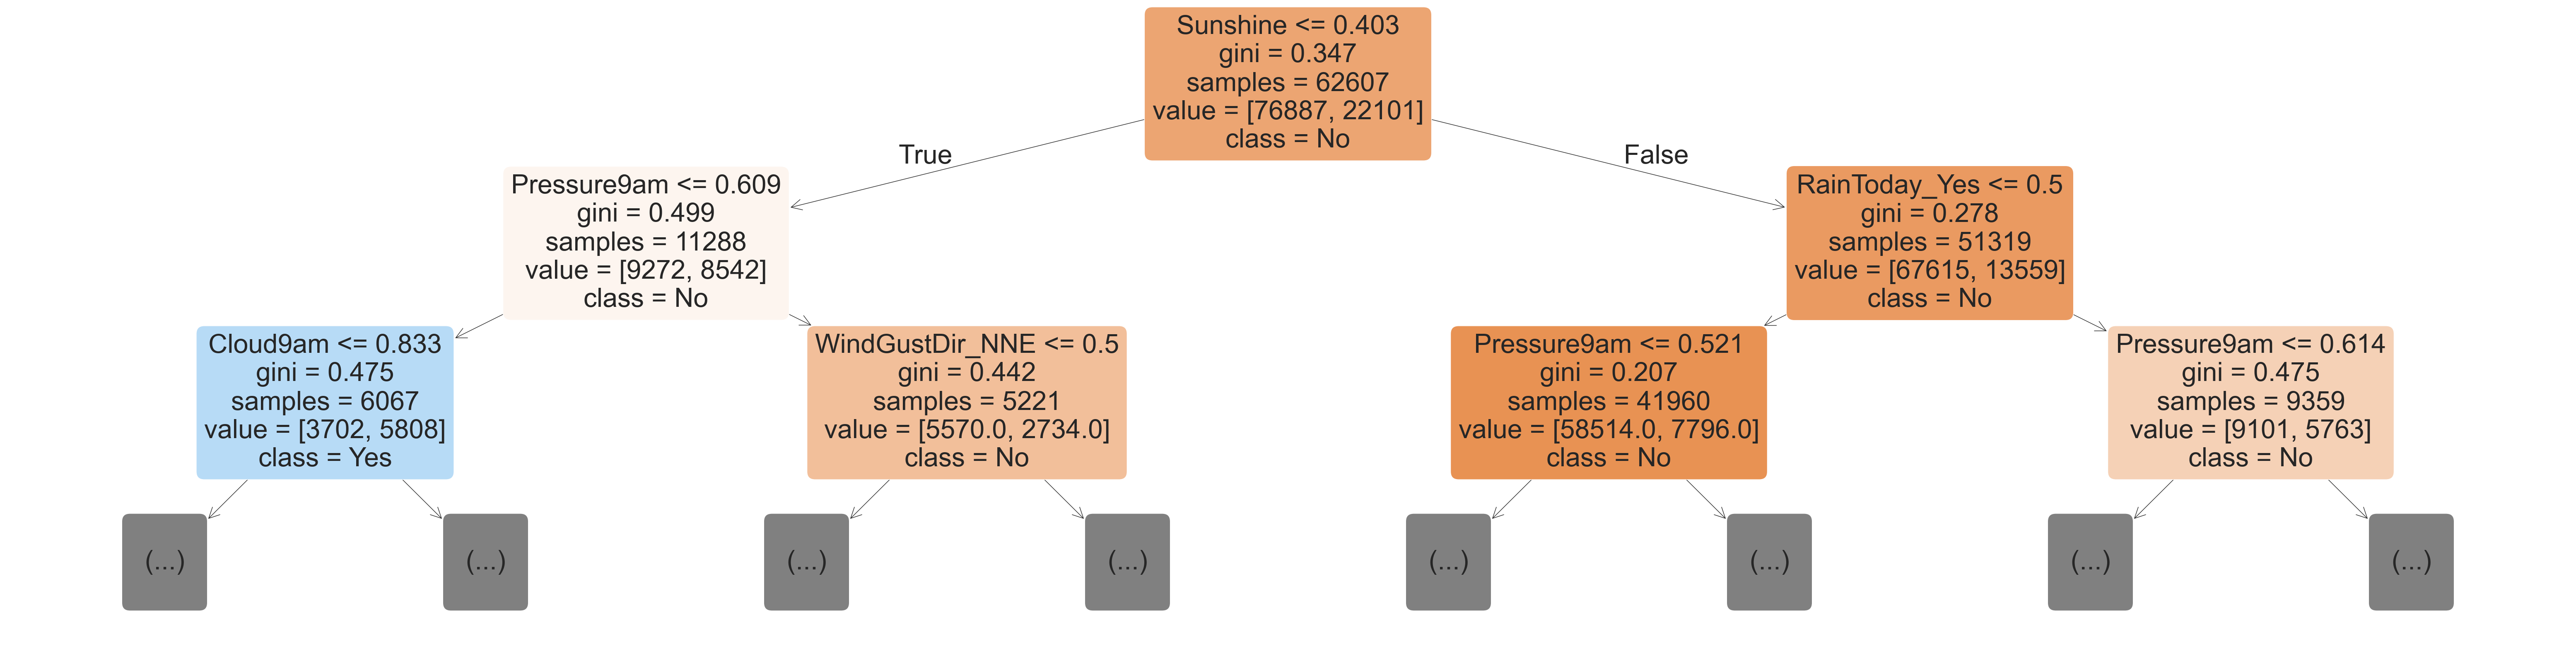

In [145]:
plt.figure(figsize=(80,20))
plot_tree(model.estimators_[0], max_depth=2, feature_names=X_train.columns, filled=True, rounded=True, class_names=model.classes_);

In [146]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

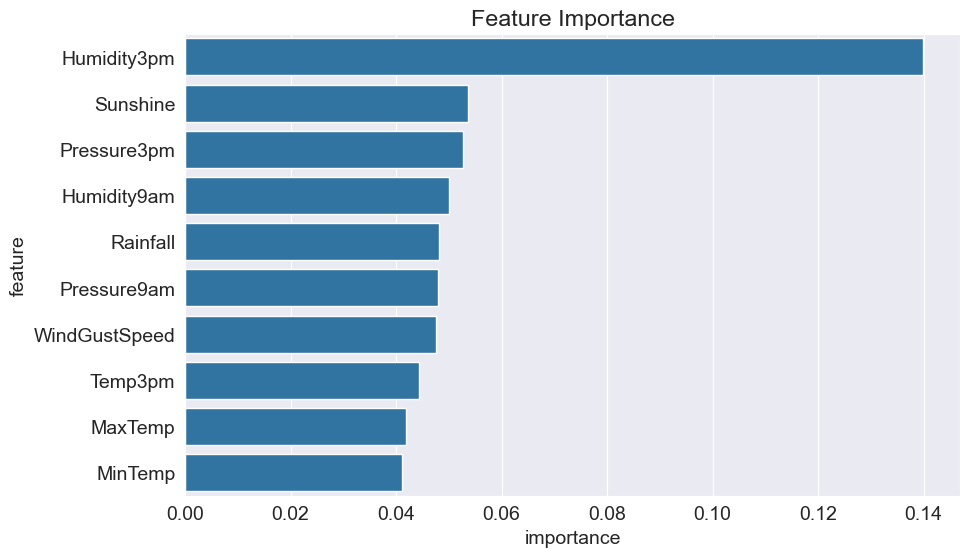

In [147]:
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

## Hyperparameter Tuning with Random Forests

Just like decision trees, random forests also have several hyperparameters. In fact many of these hyperparameters are applied to the underlying decision trees.

In [148]:
base_model = RandomForestClassifier(random_state=42, n_jobs=-1).fit(X_train, train_targets)

In [150]:
base_train_acc = base_model.score(X_train, train_targets)
base_val_acc = base_model.score(X_val, val_targets)

base_accs = base_train_acc, base_val_acc

### `n_estimators`

This controls the number of decision trees in the random forest. The default value is 100. For larger datasets, it helps to have a greater number of estimators. As a general rule, try to have as few estimators as needed.


**10 estimators**

In [151]:
model = RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=10)

In [152]:
model.fit(X_train, train_targets)

,n_estimators,10
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [153]:
model.score(X_train, train_targets), model.score(X_val, val_targets)

(0.986958015112943, 0.8485868492832686)

In [154]:
base_accs

(0.9999494888269285, 0.8566537055307295)

**500 estimators**

In [155]:
model = RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=500)
model.fit(X_train, train_targets)

,n_estimators,500
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [156]:
model.score(X_train, train_targets), model.score(X_val, val_targets)

(0.9999797955307714, 0.8577563693343393)

In [157]:
base_accs

(0.9999494888269285, 0.8566537055307295)

✅ Best n_estimators: 70 (Validation Error = 0.1420)


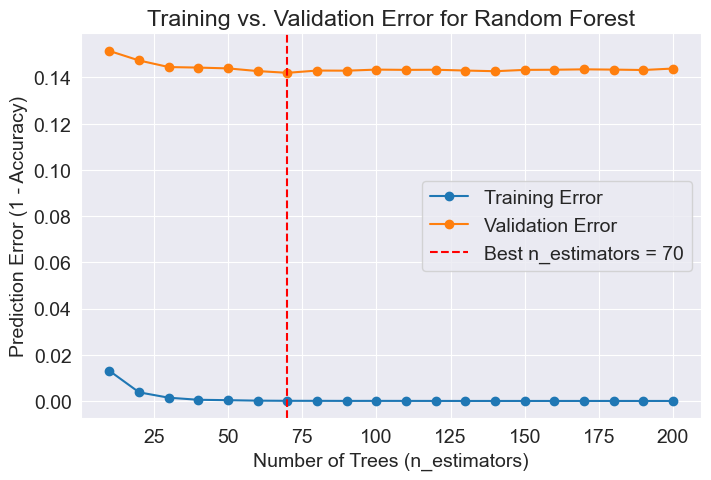

In [197]:
def n_estimators_error(n):
    model = RandomForestClassifier(
        random_state=42,
        n_jobs=-1,
        n_estimators=n
    )
    model.fit(X_train, train_targets)
    train_pred = model.predict(X_train)
    val_pred = model.predict(X_val)

    return {
        "n_estimators": n,
        "Training Error": 1 - accuracy_score(train_targets, train_pred),
        "Validation Error": 1 - accuracy_score(val_targets, val_pred)
    }

# Test several values of n_estimators
results = [n_estimators_error(n) for n in range(10, 201, 10)]

errors_df = pd.DataFrame(results)

# --- Find best n_estimators (lowest validation error) ---
best_row = errors_df.loc[errors_df["Validation Error"].idxmin()]
best_n = int(best_row["n_estimators"])
best_val_err = best_row["Validation Error"]

print(f"✅ Best n_estimators: {best_n} (Validation Error = {best_val_err:.4f})")

# --- Plot ---
plt.figure(figsize=(8, 5))
plt.plot(errors_df["n_estimators"], errors_df["Training Error"], label="Training Error", marker='o')
plt.plot(errors_df["n_estimators"], errors_df["Validation Error"], label="Validation Error", marker='o')
plt.axvline(x=best_n, color='r', linestyle='--', label=f"Best n_estimators = {best_n}")
plt.xlabel("Number of Trees (n_estimators)")
plt.ylabel("Prediction Error (1 - Accuracy)")
plt.title("Training vs. Validation Error for Random Forest")
plt.legend()
plt.grid(True)
plt.show()

### `max_depth` and `max_leaf_nodes`

These arguments are passed directly to each decision tree, and control the maximum depth and max. no leaf nodes of each tree respectively. By default, no maximum depth is specified, which is why each tree has a training accuracy of 100%. You can specify a `max_depth` to reduce overfitting.

Let's define a helper function to `max depth`, `max_leaf_nodes` and other hyperparameters easily.

In [165]:
def test_params(**params):
    model = RandomForestClassifier(
        random_state=42,
        n_jobs=-1,
        **params
    )
    model.fit(X_train, train_targets)
    return model.score(X_train, train_targets), model.score(X_val, val_targets)


In [167]:
test_params(max_leaf_nodes=2**10)

(0.87769224552471, 0.8510823515756485)

In [183]:
def sweep_and_plot(param_name, values, fixed_params=None):
    """
    Sweeps one sklearn RF param using your test_params() and plots error lines.
    fixed_params: dict with any other params you want to keep fixed.
    Returns (df, best_value).
    """
    fixed_params = fixed_params or {}
    rows = []
    for v in values:
        params = {**fixed_params, param_name: v}
        train_acc, val_acc = test_params(**params)
        rows.append({
            param_name: v if v is not None else "None",
            "Training Error": 1 - train_acc,
            "Validation Error": 1 - val_acc
        })
    df = pd.DataFrame(rows)

    # best (lowest validation error)
    best_idx = df["Validation Error"].idxmin()
    best_val = values[best_idx]

    # plot
    plt.figure(figsize=(7,4))
    x = list(range(len(values)))
    plt.plot(x, df["Training Error"], marker='o', label="Training Error")
    plt.plot(x, df["Validation Error"], marker='o', label="Validation Error")
    plt.xticks(x, df[param_name], rotation=45)
    plt.xlabel(param_name)
    plt.ylabel("Prediction Error (1 - Accuracy)")
    plt.title(f"Training vs Validation Error — {param_name}")
    plt.legend()
    plt.tight_layout()
    plt.show()

    print(f"Optimal {param_name}: {best_val}")
    return df, best_val


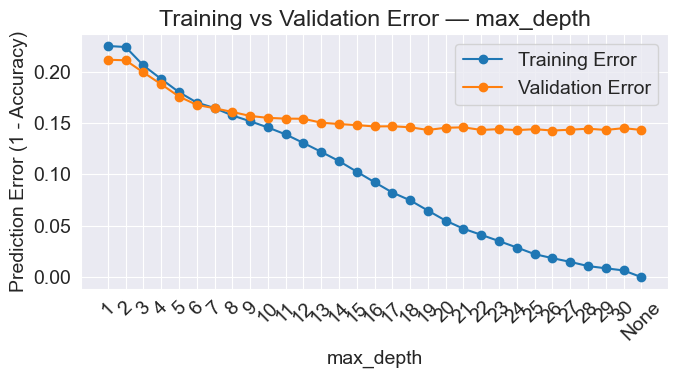

Optimal max_depth: 26 (Validation Error=0.1428)


In [169]:
# Try shallow to deep; include None (unlimited depth)
max_depth_values = list(range(1, 31)) + [None]
md_df, best_max_depth = sweep_and_plot("max_depth", max_depth_values)

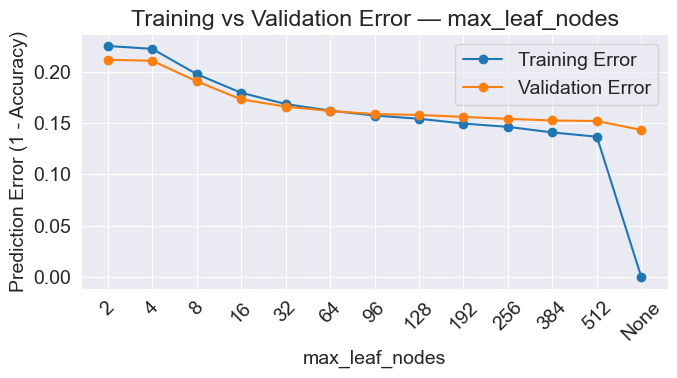

Optimal max_leaf_nodes: None (Validation Error=0.1433)


In [171]:
# ---------- 2) max_leaf_nodes ----------
# Reasonable sweep (powers of two + a few extras). Must be >= 2 for sklearn.
max_leaf_values = [2, 4, 8, 16, 32, 64, 96, 128, 192, 256, 384, 512, None]
mln_df, best_max_leaf_nodes = sweep_and_plot("max_leaf_nodes", max_leaf_values)

In [172]:
# --- Test the combined best settings ---
final_params = {
    "max_depth": best_max_depth,                # e.g. from your sweep
    "max_leaf_nodes": best_max_leaf_nodes       # e.g. from your sweep
}
train_acc, val_acc = test_params(**final_params)
print("Final params:", final_params)
print(f"→ Train acc: {train_acc:.4f}")
print(f"→ Val   acc: {val_acc:.4f}")


Final params: {'max_depth': 26, 'max_leaf_nodes': None}
→ Train acc: 0.9815
→ Val   acc: 0.8572


In [177]:
print(f"-> Base accs: Train {base_accs[0]:.4f}, Val {base_accs[1]:.4f}")

-> Base accs: Train 0.9999, Val 0.8567


### `max_features`

Instead of picking all features for every split, we can specify only a fraction of features to be chosen randomly.

<img src="max_feats.png" width="720">

Notice that the default value `auto` causes only $\sqrt{n}$ out of total features ( $n$ ) to be chosen randomly at each split. This is the reason each decision tree is in the forest is different. While it may seem counterintuitive, choosing all features for every split of every tree will lead to identical trees, so the random forest will not generalize well.

In [175]:
test_params(max_features=6,max_depth=best_max_depth, max_leaf_nodes=best_max_leaf_nodes)

(0.9618741665656443, 0.8535778538680285)

### `min_samples_split` and `min_samples_leaf`

By default, the decision tree classifier tries to split every node that has 2 or more. You can increase the values of these arguments to change this behavior and reduce overfitting, especially for very large datasets.

In [179]:
test_params(min_samples_split=100,min_samples_leaf=60,max_depth=best_max_depth, max_leaf_nodes=best_max_leaf_nodes)

(0.8500929405584515, 0.8455109976205676)

Finding the best values

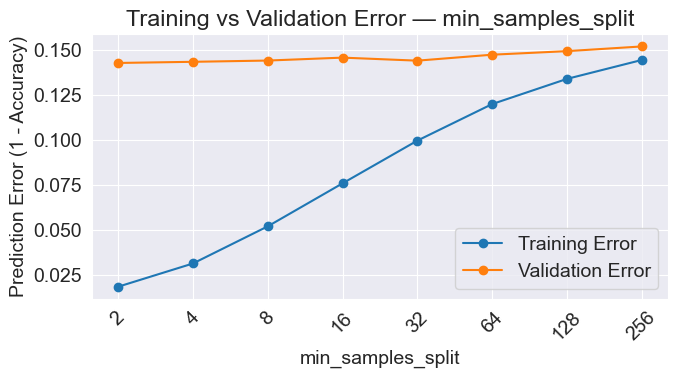

Optimal min_samples_split: 2


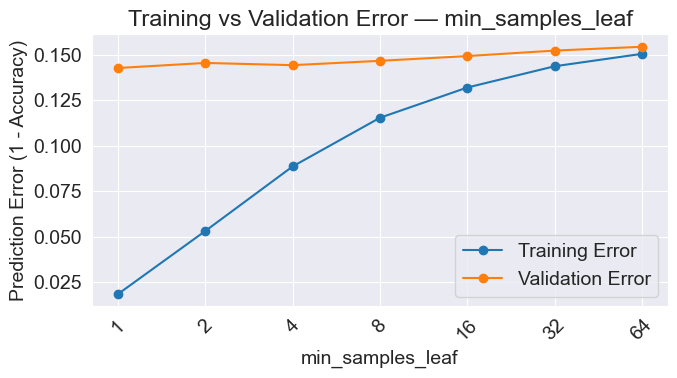

Optimal min_samples_leaf: 1
Best combo so far: {'min_samples_split': 2, 'min_samples_leaf': 1}


In [184]:
# Your best from earlier
fixed_core = {
    "max_depth": best_max_depth,
    "max_leaf_nodes": best_max_leaf_nodes,  # can be None
}

# 1) Sweep min_samples_split (keep a reasonable min_samples_leaf fixed first)
split_values = [2, 4, 8, 16, 32, 64, 128, 256]
leaf_anchor = 1  # start simple; you can try 2/4/8 later
df_split, best_mss = sweep_and_plot(
    "min_samples_split", split_values, {**fixed_core, "min_samples_leaf": leaf_anchor}
)

# 2) Sweep min_samples_leaf using the best split you just found
leaf_values = [1, 2, 4, 8, 16, 32, 64]
df_leaf, best_msl = sweep_and_plot(
    "min_samples_leaf", leaf_values, {**fixed_core, "min_samples_split": best_mss}
)

print("Best combo so far:", {"min_samples_split": best_mss, "min_samples_leaf": best_msl})


In [185]:
test_params(min_samples_split=best_mss, min_samples_leaf=best_mss,
            max_depth=best_max_depth, max_leaf_nodes=best_max_leaf_nodes)

(0.9468218369903423, 0.8544483779235099)

### `min_impurity_decrease`

This argument is used to control the threshold for splitting nodes. A node will be split if this split induces a decrease of the impurity (Gini index) greater than or equal to this value. It's default value is 0, and you can increase it to reduce overfitting.


In [186]:
test_params(min_impurity_decrease=1e-6)

(0.9888168262819735, 0.8561313910974406)

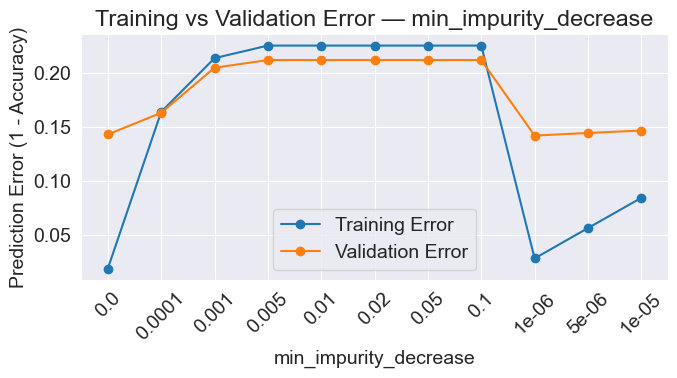

Optimal min_impurity_decrease: 1e-06
Best min_impurity_decrease: 1e-06


In [192]:
impurity_values = [0.0, 0.0001, 0.001, 0.005, 0.01, 0.02, 0.05, 0.1,1e-6, 5e-6, 1e-5]

fixed_params = {
    "max_depth": best_max_depth,
    "max_leaf_nodes": best_max_leaf_nodes,
    "min_samples_split": best_mss,
    "min_samples_leaf": best_msl,
}

impurity_df, best_impurity = sweep_and_plot(
    "min_impurity_decrease",
    impurity_values,
    fixed_params=fixed_params
)

print("Best min_impurity_decrease:", best_impurity)

In [193]:
final_params = {
    "max_depth": best_max_depth,
    "max_leaf_nodes": best_max_leaf_nodes,
    "min_samples_split": best_mss,
    "min_samples_leaf": best_msl,
    "min_impurity_decrease": best_impurity
}

train_acc, val_acc = test_params(**final_params)
print("Final params:", final_params)
print(f"→ Train acc: {train_acc:.4f}")
print(f"→ Val   acc: {val_acc:.4f}")


Final params: {'max_depth': 26, 'max_leaf_nodes': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_impurity_decrease': 1e-06}
→ Train acc: 0.9721
→ Val   acc: 0.8583


### `bootstrap`, `max_samples`

By default, a random forest doesn't use the entire dataset for training each decision tree. Instead it applies a technique called bootstrapping. For each tree, rows from the dataset are picked one by one randomly, with replacement i.e. some rows may not show up at all, while some rows may show up multiple times.


Bootstrapping helps the random forest generalize better, because each decision tree only sees a fraction of th training set, and some rows randomly get higher weightage than others.

In [195]:
train_acc, val_acc = test_params(**final_params, bootstrap=False)
print(f"→ Train acc without bootstrap: {train_acc:.4f}")
print(f"→ Val acc without bootstrap: {val_acc:.4f}")

→ Train acc without bootstrap: 0.9864
→ Val acc without bootstrap: 0.8558


### `class_weight`

In [196]:
test_params(class_weight={'No': 1, 'Yes': 2})

(0.9999595910615429, 0.8558412164122802)

### Putting it together

Let's train a random forest with customized hyperparameters based on our learnings. Of course, different hyperpraams

In [233]:
model = RandomForestClassifier(
    n_jobs=-1,                  # use all CPU cores (good for speed)
    random_state=42,             # ensures reproducibility
    max_depth=best_max_depth,   # your tuned depth limit (e.g. 26)
    max_leaf_nodes=best_max_leaf_nodes,  # can be None = unlimited
    min_samples_leaf=best_msl,  # tuned min samples per leaf
    min_samples_split=best_mss, # tuned min samples to split a node
    min_impurity_decrease=best_impurity  # tuned impurity threshold

)


In [235]:
model.fit(X_train, train_targets)

,n_estimators,100
,criterion,'gini'
,max_depth,26
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,1e-06
,bootstrap,True
,oob_score,False


In [236]:
model.score(X_train, train_targets), model.score(X_val, val_targets)

(0.972077423526084, 0.8582786837676281)

## Making Predictions on New Inputs

In [237]:
def predict_input(single_input):
    input_df = pd.DataFrame([single_input])
    input_df[numeric_cols] = imputer.transform(input_df[numeric_cols])
    input_df[numeric_cols] = scaler.transform(input_df[numeric_cols])
    input_df[encoded_cols] = encoder.transform(input_df[categorical_cols])
    input_X = input_df[numeric_cols + encoded_cols]
    pred = model.predict(input_X)[0]
    prob = model.predict_proba(input_X)[0][list(model.classes_).index(pred)]
    return pred, prob